In [3]:
import pickle
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random
import sklearn


In [34]:
# Load data from 2018


with open("2018_final_processed_hp.pkl", "rb") as f:
    data_18 = pickle.load(f)
    
# Build data object for 2019 + 2020 training set

target_households = ['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT']


def build_data(df, target_households, train_size = 0.8):
    data = {"households":target_households}
    
    for household in target_households:
        train_data = np.array_split(df[household], daily_resolution)
        day_splits_load = [df[household].iloc[day*daily_resolution:(day+1)*daily_resolution] for day in range(int(df.shape[0]/daily_resolution))]
        day_splits_temperature = [df["APPARENT_TEMPERATURE:TOTAL"].iloc[day*daily_resolution:(day+1)*daily_resolution] for day in range(int(df.shape[0]/daily_resolution))]

        train_elements = int(len(day_splits_temperature)*train_size)

        day_splits_temperature_train = day_splits_temperature[:train_elements]
        day_splits_temperature_test = day_splits_temperature[train_elements:]

        day_splits_load_train = day_splits_load[:train_elements]
        day_splits_load_test = day_splits_load[train_elements:]
        data.update({household+" day_splits_load_train":day_splits_load_train})
        data.update({household+" day_splits_load_test":day_splits_load_test})
        data.update({"day_splits_temperature_train":day_splits_temperature_train})
        data.update({"day_splits_temperature_test":day_splits_temperature_test})
    return data

data = build_data(df, target_households, train_size = ) # never simply print this data object, it burns your computer



In [35]:
data.keys()

dict_keys(['households', 'SFH3_P_TOT day_splits_load_train', 'SFH3_P_TOT day_splits_load_test', 'day_splits_temperature_train', 'day_splits_temperature_test', 'SFH4_P_TOT day_splits_load_train', 'SFH4_P_TOT day_splits_load_test', 'SFH5_P_TOT day_splits_load_train', 'SFH5_P_TOT day_splits_load_test', 'SFH7_P_TOT day_splits_load_train', 'SFH7_P_TOT day_splits_load_test', 'SFH9_P_TOT day_splits_load_train', 'SFH9_P_TOT day_splits_load_test', 'SFH12_P_TOT day_splits_load_train', 'SFH12_P_TOT day_splits_load_test', 'SFH14_P_TOT day_splits_load_train', 'SFH14_P_TOT day_splits_load_test', 'SFH16_P_TOT day_splits_load_train', 'SFH16_P_TOT day_splits_load_test', 'SFH18_P_TOT day_splits_load_train', 'SFH18_P_TOT day_splits_load_test', 'SFH19_P_TOT day_splits_load_train', 'SFH19_P_TOT day_splits_load_test', 'SFH20_P_TOT day_splits_load_train', 'SFH20_P_TOT day_splits_load_test', 'SFH21_P_TOT day_splits_load_train', 'SFH21_P_TOT day_splits_load_test', 'SFH22_P_TOT day_splits_load_train', 'SFH22_P_

In [36]:
## Now, we have to replace the training data

# Replacing temperature
day_splits_temperature = [data_18["APPARENT_TEMPERATURE:TOTAL"].iloc[day*24:(day+1)*24] for day in range(int(data_18.shape[0]/24))]
data["day_splits_temperature_test"] = day_splits_temperature

# Replacing relevant test datasets - we note that the 2018 test dataset includes different households due to missing data
households_18 = ['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH6_P_TOT', 'SFH9_P_TOT', 'SFH10_P_TOT',
       'SFH11_P_TOT', 'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT',
       'SFH18_P_TOT', 'SFH19_P_TOT', 'SFH22_P_TOT', 'SFH27_P_TOT',
       'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT', 'SFH31_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT']

households_18 = list(set(data["households"]).intersection(households_18)) # only keep households that are in training as well as test


daily_resolution = 24

for household in households_18:
    train_data = np.array_split(data_18[household], daily_resolution)
    day_splits_load = [data_18[household].iloc[day*daily_resolution:(day+1)*daily_resolution] for day in range(int(data_18.shape[0]/daily_resolution))]
    data[household+" day_splits_load_test"] = day_splits_load
    
data["households_18"] = households_18



In [37]:
data.keys()

dict_keys(['households', 'SFH3_P_TOT day_splits_load_train', 'SFH3_P_TOT day_splits_load_test', 'day_splits_temperature_train', 'day_splits_temperature_test', 'SFH4_P_TOT day_splits_load_train', 'SFH4_P_TOT day_splits_load_test', 'SFH5_P_TOT day_splits_load_train', 'SFH5_P_TOT day_splits_load_test', 'SFH7_P_TOT day_splits_load_train', 'SFH7_P_TOT day_splits_load_test', 'SFH9_P_TOT day_splits_load_train', 'SFH9_P_TOT day_splits_load_test', 'SFH12_P_TOT day_splits_load_train', 'SFH12_P_TOT day_splits_load_test', 'SFH14_P_TOT day_splits_load_train', 'SFH14_P_TOT day_splits_load_test', 'SFH16_P_TOT day_splits_load_train', 'SFH16_P_TOT day_splits_load_test', 'SFH18_P_TOT day_splits_load_train', 'SFH18_P_TOT day_splits_load_test', 'SFH19_P_TOT day_splits_load_train', 'SFH19_P_TOT day_splits_load_test', 'SFH20_P_TOT day_splits_load_train', 'SFH20_P_TOT day_splits_load_test', 'SFH21_P_TOT day_splits_load_train', 'SFH21_P_TOT day_splits_load_test', 'SFH22_P_TOT day_splits_load_train', 'SFH22_P_

In [38]:

def temp_to_cluster(km, day_splits_temperature_test):
    cluster_mappings = []
    for idx, day_splits_temp in enumerate(day_splits_temperature_test):
        cluster = km.predict(day_splits_temp.to_numpy().reshape(1,-1))[0] # select cluster result
        cluster_mappings.append(cluster)
    return cluster_mappings

def cluster_to_load(cluster_mappings, clustered_profiles):
    profile = []
    
    for cluster_mapping in cluster_mappings:
        selected_load_profiles = clustered_profiles[str(cluster_mapping)]
        selected_profile = random.choice(selected_load_profiles)
        profile.extend(selected_profile.values)
    return profile

def train_to_cluster(n_clusters:int, day_splits_temperature_train:list, day_splits_load_train:list):
    
    # create empty dict for cluster load profiles
    clustered_profiles = {}
    for cluster in range(n_clusters):
        clustered_profiles[str(cluster)] = []
    
    # train KMeans based on cluster amount
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(day_splits_temperature_train)
    
    # order every temperature profile in cluster
    for idx, day_splits_temp in enumerate(day_splits_temperature_train):
        cluster = km.predict(day_splits_temp.to_numpy().reshape(1,-1))[0] # select cluster result
        clustered_profiles[str(cluster)].append(day_splits_load_train[idx])
    
    return km, clustered_profiles

def return_synthetic_profiles(n_clusters, day_splits_temperature_train,day_splits_load_train,day_splits_temperature_test):
    km, clustered_profiles = train_to_cluster(n_clusters, day_splits_temperature_train, day_splits_load_train)
    cluster_mappings = temp_to_cluster(km, day_splits_temperature_test)
    synthetic_profile = cluster_to_load(cluster_mappings, clustered_profiles)
    return synthetic_profile, km, clustered_profiles

def synthetic_whole_load18(data, n_clusters):

    synthetic_df = pd.DataFrame({},index=pd.concat(data["day_splits_temperature_test"]).index)
    real_df = pd.DataFrame({},index=pd.concat(data["day_splits_temperature_test"]).index)


    for household in data["households_18"]:
        day_splits_load_train = data[household+" day_splits_load_train"]
        day_splits_load_test = data[household+" day_splits_load_test"]
        day_splits_temperature_train = data["day_splits_temperature_train"]
        day_splits_temperature_test = data["day_splits_temperature_test"]
        synthetic_profile, km, clustered_profiles =  return_synthetic_profiles(n_clusters, day_splits_temperature_train,day_splits_load_train,day_splits_temperature_test)
        synthetic_df[household] = synthetic_profile
        real_df[household] = pd.concat(day_splits_load_test).values
    return real_df, synthetic_df

n_clusters = 10
real_df, synthetic_df = synthetic_whole_load18(data, n_clusters)


{'mape': 0.7143815565978554,
 'peak_mape': 0.5409260150841456,
 'error_annual': -0.023743219850183336}

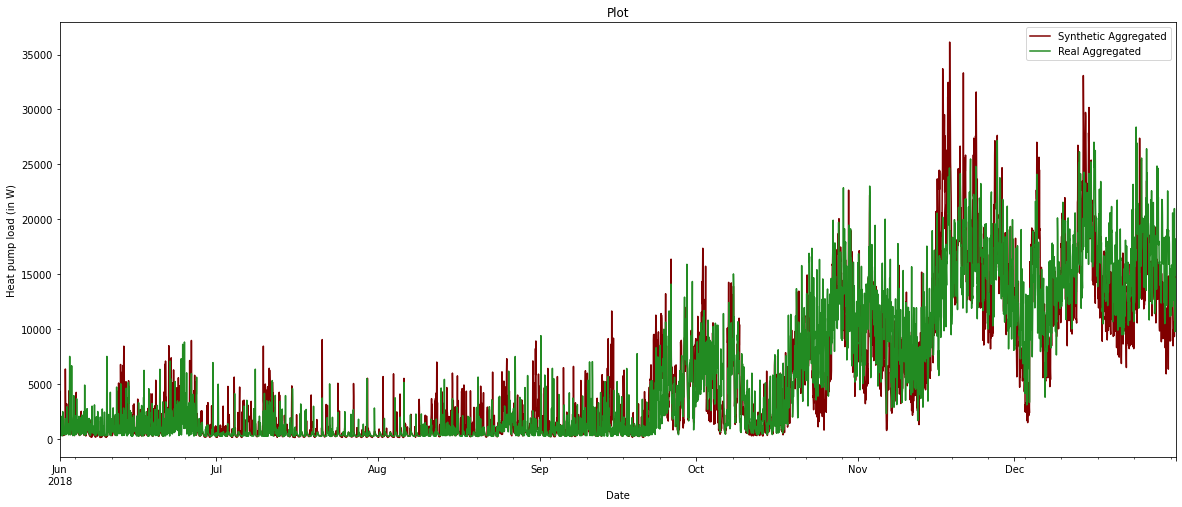

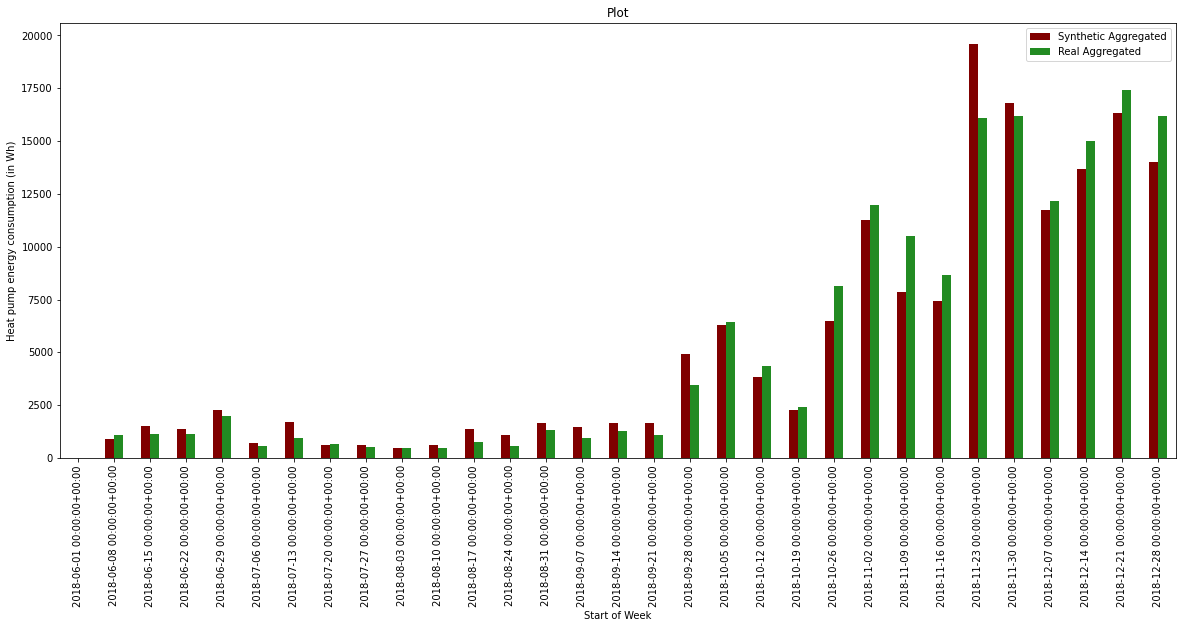

In [59]:
def create_combined_df(synthetic_df, real_df):
    combined_df = pd.DataFrame(index=real_df.index)
    combined_df["Synthetic Aggregated"] = synthetic_df.sum(axis=1)
    combined_df["Real Aggregated"] = real_df.sum(axis=1)
    return combined_df

def plot_standard(combined_df, title="Plot"):
    ax = combined_df.plot(figsize=(20,8),title=title,color=["maroon","forestgreen"])
    ax.set_xlabel("Date")
    ax.set_ylabel("Heat pump load (in W)")
    
def plot_reduced(combined_df, reduction=24*7,title="Plot"):
    reduced_df = combined_df.rolling(reduction).mean() 
    reduced_df = reduced_df.iloc[::reduction, :]

    ax = reduced_df.plot.bar(figsize=(20,8),title=title,color=["maroon","forestgreen"])
    ax.set_xlabel("Start of Week")
    ax.set_ylabel("Heat pump energy consumption (in Wh)")
    
def calculate_metrics(combined_df):
    # calculate MAPE
    mape = sklearn.metrics.mean_absolute_percentage_error(combined_df["Synthetic Aggregated"],combined_df["Real Aggregated"])
    
    # calculate Peak MAPE
    reduction = 24
    reduced_df = combined_df.rolling(reduction).max() 
    reduced_df = reduced_df.iloc[::reduction, :]
    reduced_df.dropna(inplace=True)
    peak_mape = sklearn.metrics.mean_absolute_percentage_error(reduced_df["Synthetic Aggregated"],reduced_df["Real Aggregated"])

    # calculate Error of annual consumption
    combined_df_sum = combined_df.sum()
    error_annual = ((float(combined_df["Synthetic Aggregated"].sum())-combined_df["Real Aggregated"].sum())/combined_df["Real Aggregated"].sum())


    result = {"mape":mape,"peak_mape":peak_mape, "error_annual":error_annual}
    return result
    
combined_df = create_combined_df(synthetic_df, real_df)
plot_standard(combined_df)
plot_reduced(combined_df)
calculate_metrics(combined_df)



In [45]:
# Saving our results for detailed metrics calculation in the bottom

final_combined_df = combined_df

# Calculating Heat Pump Load Profile Mean Variance 

In [32]:
# first, we create a synthetic heat pump load profile based on a number of K clusters

iterations = 50

mv_results = []

for n_clusters in range(2,20):
    
    mean_variance_df = pd.DataFrame({})
    annual_errors = []
    for iteration in range(iterations):
        real_df, synthetic_df = synthetic_whole_load18(data, n_clusters)
        combined_df = create_combined_df(synthetic_df, real_df)
        error_annual = abs(((float(combined_df["Synthetic Aggregated"].sum())-combined_df["Real Aggregated"].sum())/combined_df["Real Aggregated"].sum()))
        annual_errors.append(error_annual)
        
        mean_variance_df[str(iteration)] = combined_df["Synthetic Aggregated"]

    # iterate over every row, calculate variance
    variances = []
    for i in range(mean_variance_df.shape[0]):
        variances.append(mean_variance_df.iloc[i].values.var())

    mean_var = np.array(variances).mean()
    mean_annual_error = np.array(annual_errors).mean()
    temp_res = {"Clusters (K)":n_clusters,"Mean Variance":mean_var,"Mean Annual Error":mean_annual_error}
    print(temp_res)
    mv_results.append(temp_res)
    

{'Clusters (K)': 2, 'Mean Variance': 4503986.063499863, 'Mean Annual Error': 0.07599454424388664}
{'Clusters (K)': 3, 'Mean Variance': 3780846.159201062, 'Mean Annual Error': 0.028350871410550288}
{'Clusters (K)': 4, 'Mean Variance': 3769562.4226771896, 'Mean Annual Error': 0.029134377024833853}
{'Clusters (K)': 5, 'Mean Variance': 3752596.3709546058, 'Mean Annual Error': 0.014143368326855359}
{'Clusters (K)': 6, 'Mean Variance': 3646252.2464495506, 'Mean Annual Error': 0.012768759034785105}
{'Clusters (K)': 7, 'Mean Variance': 3539060.9085111306, 'Mean Annual Error': 0.014962795315789798}
{'Clusters (K)': 8, 'Mean Variance': 3413490.250913877, 'Mean Annual Error': 0.014637848672834092}
{'Clusters (K)': 9, 'Mean Variance': 3345826.2795613725, 'Mean Annual Error': 0.011441052258590944}
{'Clusters (K)': 10, 'Mean Variance': 3423713.9542831467, 'Mean Annual Error': 0.013035084272602693}
{'Clusters (K)': 11, 'Mean Variance': 3269711.6746632503, 'Mean Annual Error': 0.010909114620685587}
{'

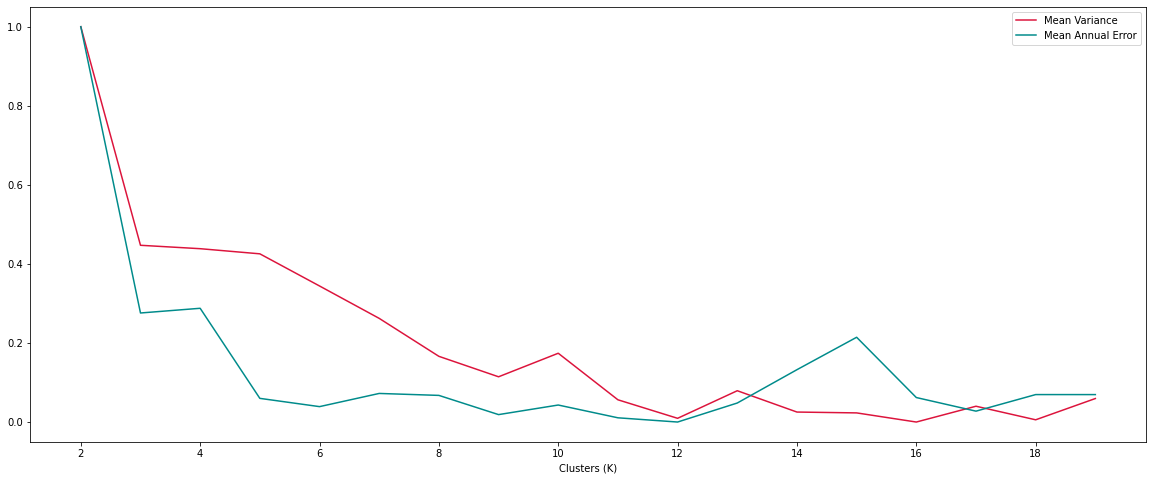

In [46]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import MaxNLocator


mv_results_df = pd.DataFrame(mv_results)

scaler = MinMaxScaler()
mv_results_df_scaled = pd.DataFrame(scaler.fit_transform(mv_results_df), columns=mv_results_df.columns)
#mv_results_df_scaled["Mean Annual Error"] = mv_results_df_scaled["Mean Annual Error"]*-1
mv_results_df_scaled["Clusters (K)"] = mv_results_df["Clusters (K)"]


ax = mv_results_df_scaled.set_index("Clusters (K)").plot(figsize=(20,8),color=["crimson","darkcyan"])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))


# Metrics

In this part, we are calculating metrics for the evaluation of our work.

In [51]:
# create df range
# Metrics based on https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9174809

idx = pd.date_range(start='2018-06-01', end='2019-01-01', freq="H")
df = final_combined_df


color_synth = "maroon"
color_real = "forestgreen" 

In [52]:
df["date"] = idx[:df.shape[0]]
df.set_index("date",inplace=True)

In [53]:
df.corr()

,Synthetic Aggregated,Real Aggregated
Synthetic Aggregated,1.000000,0.878724
Real Aggregated,0.878724,1.000000



## 1. Load Factor 

Load factor is defined as the ratio of average and peak value
of a load time series.

In [54]:
load_factor_df = pd.DataFrame({})

load_factor_df["SFH3 Mean Synthetic"] = df.groupby(pd.PeriodIndex(df.index, freq="M"))['Synthetic Aggregated'].mean()
load_factor_df["SFH3 Mean Real"] = df.groupby(pd.PeriodIndex(df.index, freq="M"))['Real Aggregated'].mean()
load_factor_df["SFH3 Max Synthetic"] = df.groupby(pd.PeriodIndex(df.index, freq="M"))['Synthetic Aggregated'].max()
load_factor_df["SFH3 Max Real"] = df.groupby(pd.PeriodIndex(df.index, freq="M"))['Real Aggregated'].max()
load_factor_df["Load Factor Synthetic"] = load_factor_df["SFH3 Mean Synthetic"]/ load_factor_df["SFH3 Max Synthetic"]
load_factor_df["Load Factor Real"] = load_factor_df["SFH3 Mean Real"]/load_factor_df["SFH3 Max Real"]

<AxesSubplot: xlabel='date'>

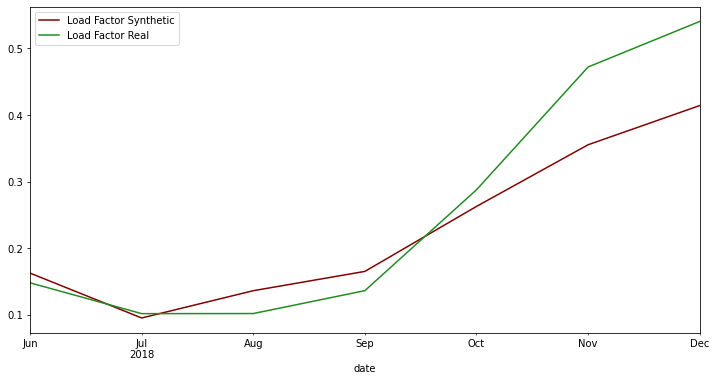

In [56]:
load_factor_df[["Load Factor Synthetic","Load Factor Real"]].plot(figsize=(12,6),color=[color_synth,color_real])

## 2 . Load Distribution Curves

Load distribution curves show the percentage of time that
load is at different levels relative to its mean value. The load
time series is normalized based off its mean value, where load
levels exceeding yearly average would have per unit values larger
than one. The vertical axis of a load distribution curve is the
percentage of time points.

In [57]:
df_synthetic_mean = df["Synthetic Aggregated"].mean()
df_real_mean = df["Real Aggregated"].mean()

df_ldc = df.copy()
df_ldc["Load Synthetic"] = df["Synthetic Aggregated"] / df_synthetic_mean
df_ldc["Load Real"] = df["Real Aggregated"] / df_real_mean

<AxesSubplot: ylabel='Density'>

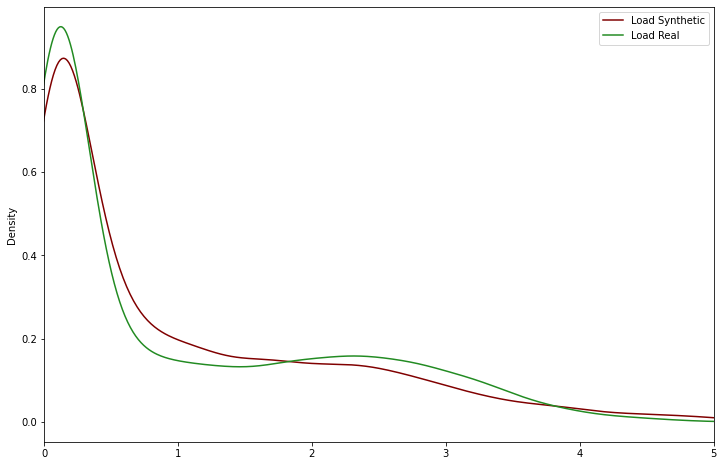

In [58]:
df_ldc[["Load Synthetic","Load Real"]].plot(kind="kde",xlim=(0,5),figsize=(12,8),color=[color_synth,color_real])